<a href="https://colab.research.google.com/github/sdgroeve/EuBIC2022_workshop_ML/blob/main/mnist_digit_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading data with Tensorflow Keras

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Defining the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

print(model.summary())

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Fitting the data

In [4]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
422/422 [==============================] - 14s 11ms/step - loss: 0.3698 - accuracy: 0.8888 - val_loss: 0.0857 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1146 - accuracy: 0.9667 - val_loss: 0.0621 - val_accuracy: 0.9830
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0863 - accuracy: 0.9729 - val_loss: 0.0509 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0716 - accuracy: 0.9771 - val_loss: 0.0455 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0638 - accuracy: 0.9799 - val_loss: 0.0399 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0407 - val_accuracy: 0.9885
Epoch 7/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0347 - val_accuracy: 0.990

### Making predictions

In [7]:
predictions = model.predict(x_test)

[[6.03573280e-09 2.10538514e-11 2.17988163e-05 ... 9.99966621e-01
  2.09484536e-08 1.84002170e-06]
 [2.05462243e-06 9.13335498e-07 9.99992967e-01 ... 1.77344653e-10
  2.16116067e-08 8.35849098e-12]
 [3.78254839e-07 9.99247849e-01 1.62130436e-05 ... 1.18870084e-04
  1.07089336e-05 6.73301315e-07]
 ...
 [2.74440106e-12 9.50463458e-11 2.41184486e-11 ... 2.24887504e-08
  1.09112129e-07 1.10512708e-07]
 [3.75112336e-07 7.94360400e-13 1.50797397e-09 ... 3.10466965e-11
  2.32740495e-05 1.25667754e-07]
 [1.28957322e-06 3.00935360e-10 3.45147191e-06 ... 3.89705074e-11
  8.32955777e-07 7.45606688e-10]]


In [14]:
predicted_classes = predictions.argmax(axis=-1)
print(predicted_classes)

[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


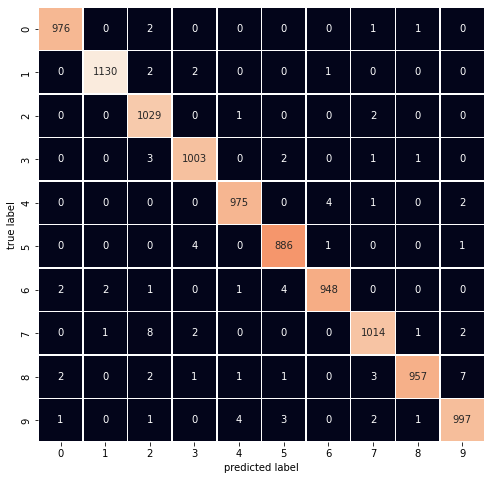

In [15]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

y_test_classes = y_test.argmax(axis=-1)
plot_confusion_matrix(y_test_classes, predicted_classes)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



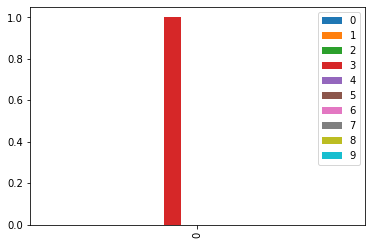

In [20]:
from keras.preprocessing import image
import pandas as pd

img = image.load_img('chicken.jpg', target_size=(28, 28), color_mode="grayscale")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
predictions = model.predict(images)

pd.DataFrame(predictions).plot.bar()
plt.show()